<h1>
<font color="#ff2e2e">
Mask Overlay
</font>
</h1>

In [524]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import dlib
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2
p = "shape_predictor_68_face_landmarks.dat"

<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [525]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<h3><font color = "#079e05"> Complete put_mask function </font></h3>

In [526]:



def put_mask(face, mask):
    '''
    Adds mask image on face image.
    
    Parameters:
        face (numpy.ndarray): face image.
        mask (numpy.ndarray): mask image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    #############
    # Your code #
    ############
    maskk = mask.copy()
    face2 = face.copy
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    mask = cv2.resize(mask, (face.shape[1] , face.shape[0]), interpolation = cv2.INTER_AREA)
    maskk = cv2.resize(maskk, (face.shape[1] , face.shape[0]), interpolation = cv2.INTER_AREA)
    gray=cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
    einstein = gray.copy()
    detector = dlib.get_frontal_face_detector()
    myface = detector(face)
    predictor = dlib.shape_predictor(p)
    coords = np.zeros((68, 2))
    landmarks = predictor(gray, myface[0])
    for n in range(0,68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        coords[n] = [x, y]

    points = [coords[2] , coords[14] , coords[8] , coords[30]]
    dst= np.asarray(points)
    dst.dtype = np.float32


    dst = np.array([[coords[2][0],coords[2][1]],[coords[14][0],coords[14][1]],[coords[8][0],coords[8][1]],[coords[28][0],coords[28][1]]],np.float32)
    src = np.array([[110,400] , [1100,400] , [600,810] ,[600,190]],np.float32)
    
    
    matrix = cv2.getPerspectiveTransform(src, dst)
    print(matrix)
    result = cv2.warpPerspective(maskk, matrix, (einstein.shape[1] , einstein.shape[0]))
    face2= cv2.addWeighted(face,1, result,1.0,0)
    return face2

<h3><font color = "#079e05"> Show the result </font></h3>

[[ 1.64858080e+00 -5.20374419e-01  3.96176783e+02]
 [ 9.44058113e-01  8.31874081e-01  1.93202117e+02]
 [ 1.21588332e-03 -2.40471119e-04  1.00000000e+00]]


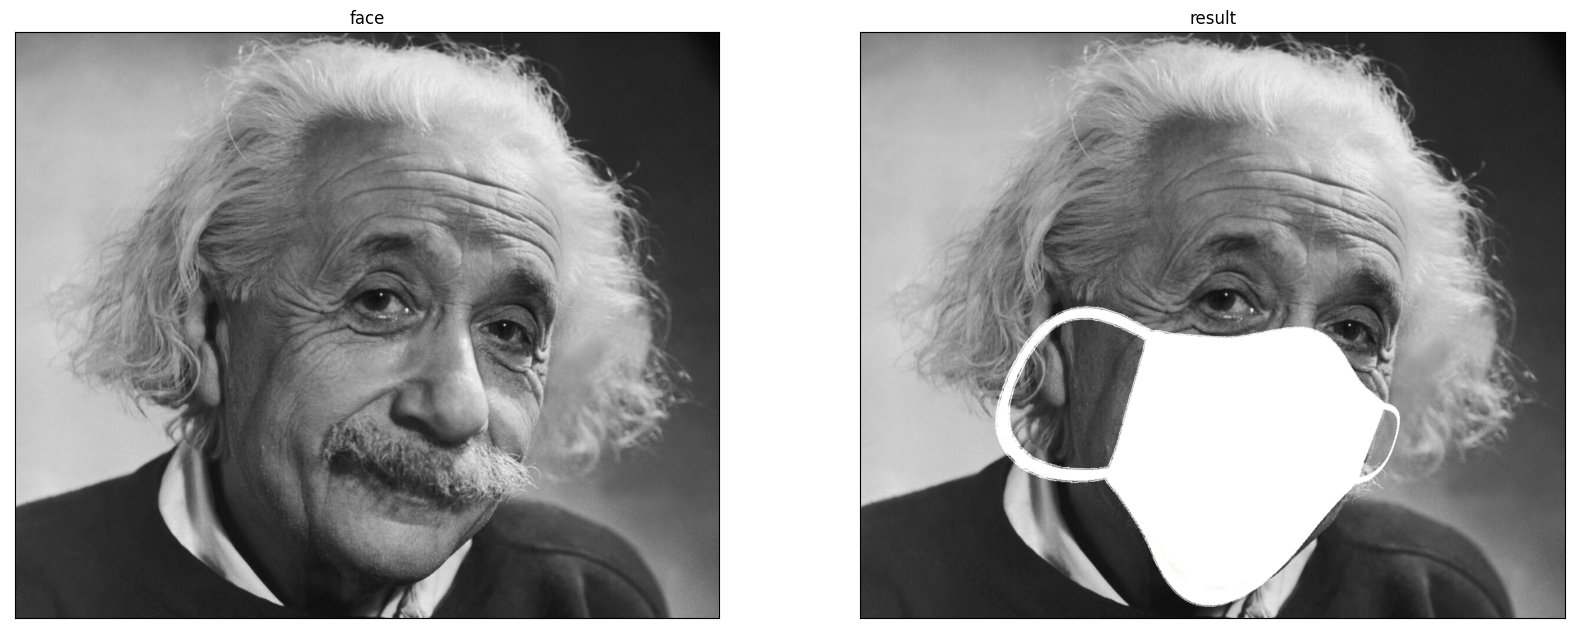

In [527]:


image_list = []
face = cv2.cvtColor(cv2.imread(os.path.join('images/Q3', 'face.jpg')), cv2.COLOR_BGR2RGB)
mask = cv2.imread(os.path.join('images/Q3', 'mask.jpg') )
# x = put_mask(face, mask)
image_list.append([face, 'face', 'img'])
image_list.append([put_mask(face, mask), 'result', 'img'])
plotter(image_list, 1, 2, True, 20, 10, '3')